In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv('data/training_set_VU_DM.csv')
test_data = pd.read_csv('data/test_set_VU_DM.csv')

In [3]:
training_data

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [4]:
training_data.shape

(4958347, 54)

In [5]:
test_data.shape

(4959183, 50)

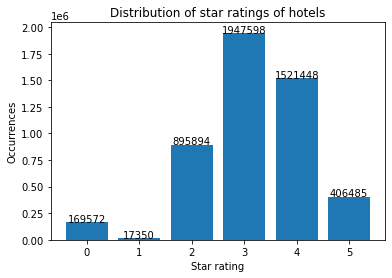

In [6]:
counts_starrating = training_data['prop_starrating'].value_counts()

stars = np.array(counts_starrating.iloc[:].index)
counts_stars = np.array(counts_starrating.iloc[:])

plt.bar(stars, counts_stars)

for index in range(len(counts_stars)):
    plt.text(stars[index], counts_stars[index], str(counts_stars[index]), ha='center')
    
plt.title('Distribution of star ratings of hotels')
plt.xlabel('Star rating')
plt.ylabel('Occurrences')
plt.show()

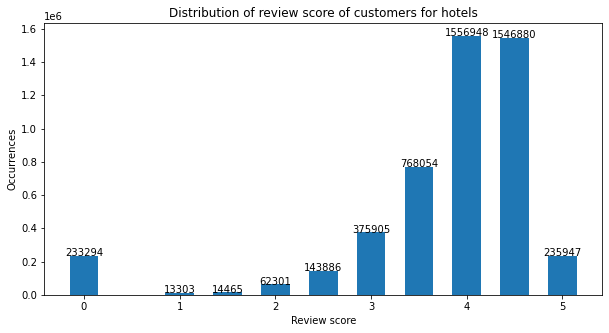

In [7]:
counts_review_score = training_data['prop_review_score'].value_counts()

scores = np.array(counts_review_score.iloc[:].index)
counts_score = np.array(counts_review_score.iloc[:])

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.bar(scores, counts_score, width=0.3)

for index in range(len(counts_score)):
    plt.text(scores[index], counts_score[index], str(counts_score[index]), ha='center')
    
plt.title('Distribution of review score of customers for hotels')
plt.xlabel('Review score')
plt.ylabel('Occurrences')
plt.show()

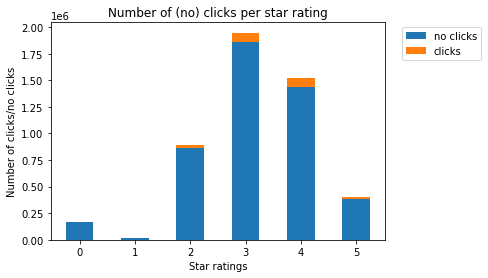

In [8]:
dict_clicked = dict()
dict_not_clicked = dict()

for s in stars:
    dict_clicked[s] = len(training_data[np.logical_and(training_data['click_bool'] == 1, training_data['prop_starrating'] == s)])
    dict_not_clicked[s] = len(training_data[np.logical_and(training_data['click_bool'] == 0, training_data['prop_starrating'] == s)])

dict_clicked = dict(sorted(dict_clicked.items()))
dict_not_clicked = dict(sorted(dict_not_clicked.items()))

counts = {'no clicks': np.array(list(dict_not_clicked.values())),
         'clicks': np.array(list(dict_clicked.values()))
         }

fig, ax = plt.subplots()
bottom = np.zeros(len(dict_clicked))
x_axis = list(dict_clicked.keys())
width = 0.5

for boolean, count in counts.items():
    p = ax.bar(x_axis, count, width, label=boolean, bottom=bottom)
    bottom += count

ax.set_title("Number of (no) clicks per star rating")
ax.legend(bbox_to_anchor=(1.3, 1))

plt.xlabel('Star ratings')
plt.ylabel('Number of clicks/no clicks')

plt.show()

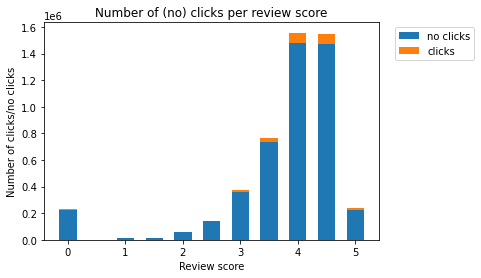

In [9]:
dict_clicked = dict()
dict_not_clicked = dict()

for s in scores:
    dict_clicked[s] = len(training_data[np.logical_and(training_data['click_bool'] == 1, training_data['prop_review_score'] == s)])
    dict_not_clicked[s] = len(training_data[np.logical_and(training_data['click_bool'] == 0, training_data['prop_review_score'] == s)])

dict_clicked = dict(sorted(dict_clicked.items()))
dict_not_clicked = dict(sorted(dict_not_clicked.items()))

counts = {'no clicks': np.array(list(dict_not_clicked.values())),
         'clicks': np.array(list(dict_clicked.values()))
         }

fig, ax = plt.subplots()
bottom = np.zeros(len(dict_clicked))
x_axis = list(dict_clicked.keys())
width = 0.3

for boolean, count in counts.items():
    p = ax.bar(x_axis, count, width, label=boolean, bottom=bottom)
    bottom += count

ax.set_title("Number of (no) clicks per review score")
ax.legend(bbox_to_anchor=(1.3, 1))

plt.xlabel('Review score')
plt.ylabel('Number of clicks/no clicks')

plt.show()

In [15]:
clicked_data = training_data[training_data['click_bool'] == 1].reset_index(drop=True)
clicked_data.shape

(221879, 54)

In [16]:
booked_data = training_data[training_data['booking_bool'] == 1].reset_index(drop=True)
booked_data.shape

(138390, 54)